In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



### Load your datasets

In [11]:
train_data = pd.read_csv('C:\\Users\\King Betse\\Downloads\\rossmann-store-sales\\train.csv')
test_data = pd.read_csv('C:\\Users\\King Betse\\Downloads\\rossmann-store-sales\\test.csv')
sample_submission = pd.read_csv('C:\\Users\\King Betse\\Downloads\\rossmann-store-sales\\sample_submission.csv')
store = pd.read_csv('C:\\Users\\King Betse\\Downloads\\rossmann-store-sales\\store.csv')

print('train_data',train_data.columns)
print()
print('test_data',test_data.columns)
print()
print('sample_submission',sample_submission.columns)
print()
print('store',store.columns)


train_data Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')

test_data Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday'],
      dtype='object')

sample_submission Index(['Id', 'Sales'], dtype='object')

store Index(['Store', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


C:\Users\King Betse\AppData\Local\Temp\ipykernel_25272\2710001987.py:1: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv('C:\\Users\\King Betse\\Downloads\\rossmann-store-sales\\train.csv')


### Handle Missing Data


In [42]:
# Check for missing values
print(train_data.isnull().sum())
print()
print(test_data.isnull().sum())
print()
print(sample_submission.isnull().sum())
print()
print(store.isnull().sum())



# Alternatively, drop rows with critical missing values
train_data.dropna(subset=['Sales'], inplace=True)  # Ensure no missing sales data

Store             0
DayOfWeek         0
Date              0
Sales             0
Customers         0
Open              0
Promo             0
StateHoliday      0
SchoolHoliday     0
Holiday_Period    0
Month             0
Day               0
Season            0
dtype: int64

Id                0
Store             0
DayOfWeek         0
Date              0
Open             11
Promo             0
StateHoliday      0
SchoolHoliday     0
dtype: int64

Id       0
Sales    0
dtype: int64

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64


### Detect and Handle Outliers

In [41]:
# Function to detect outliers using Z-scores
def detect_outliers_zscore(data, threshold=3):
    mean = np.mean(data)
    std_dev = np.std(data)
    z_scores = [(y - mean) / std_dev for y in data]
    return np.where(np.abs(z_scores) > threshold)

# Detect outliers in 'Sales'
outlier_indices = detect_outliers_zscore(train_data['Sales'])
train_data = train_data.drop(outlier_indices[0])  # Remove outliers

# Alternatively, using IQR
Q1 = train_data['Sales'].quantile(0.25)
Q3 = train_data['Sales'].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
train_data = train_data[~((train_data['Sales'] < (Q1 - 1.5 * IQR)) | (train_data['Sales'] > (Q3 + 1.5 * IQR)))]

### Merge with Store Data

In [12]:
# Merge train_data with with test_data
merged_train_and_test = pd.merge(train_data, test_data, on='Store', how='left')

# Merge train_data with store
merged_data = pd.merge(merged_train_and_test, store, on='Store', how='left')

# Merge test_data with store
merged_test = pd.merge(test_data, store, on='Store', how='left')

merged_train = pd.merge(train_data, store, on='Store', how='left')



print(train_data.columns)
print(merged_test.columns)
print(merged_data.columns)


Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday'],
      dtype='object')
Index(['Id', 'Store', 'DayOfWeek', 'Date', 'Open', 'Promo', 'StateHoliday',
       'SchoolHoliday', 'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')
Index(['Store', 'DayOfWeek_x', 'Date_x', 'Sales', 'Customers', 'Open_x',
       'Promo_x', 'StateHoliday_x', 'SchoolHoliday_x', 'Id', 'DayOfWeek_y',
       'Date_y', 'Open_y', 'Promo_y', 'StateHoliday_y', 'SchoolHoliday_y',
       'StoreType', 'Assortment', 'CompetitionDistance',
       'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2',
       'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval'],
      dtype='object')


### Count promo distribution

In [13]:
promo_train_counts=train_data['Promo'].value_counts()
promo_test_counts=test_data['Promo'].value_counts()


print("Promo Distribution in Training Set:\n", promo_train_counts)
print("Promo Distribution in Test Set:\n", promo_test_counts)



Promo Distribution in Training Set:
 Promo
0    629129
1    388080
Name: count, dtype: int64
Promo Distribution in Test Set:
 Promo
0    24824
1    16264
Name: count, dtype: int64


### Visualize Distributions

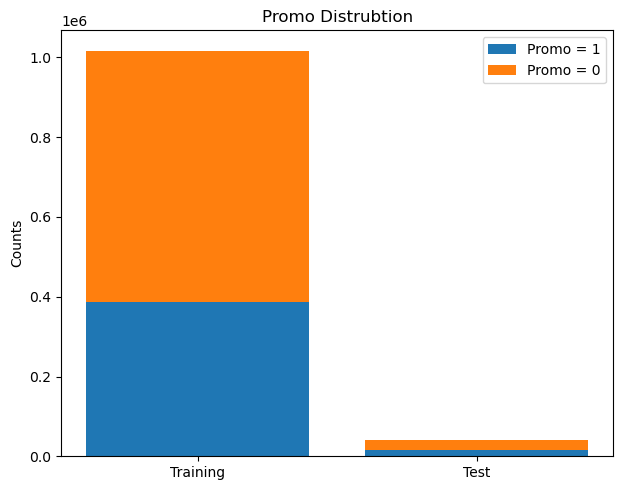

In [14]:
# Plotting Promo Distribution
plt.figure(figsize=(12,5))

#Promo
plt.subplot(1,2,1)
plt.bar(['Training','Test'], [promo_train_counts[1],promo_test_counts[1]], label='Promo = 1')
plt.bar(['Training','Test'],[promo_train_counts[0], promo_test_counts[0]],bottom= [promo_train_counts[1],promo_test_counts[1]],label="Promo = 0")
plt.title('Promo Distrubtion')
plt.ylabel('Counts')
plt.legend()

plt.tight_layout()
plt.show()

### Statical Comparison

In [15]:
from scipy.stats import chi2_contingency

# Create contingency table for Promo
promo_table = [[promo_train_counts[0], promo_train_counts[1]],
               [promo_test_counts[0], promo_test_counts[1]]]

chi2, p, _, _ = chi2_contingency(promo_table)
print(f"Chi-Squared Test for Promo: chi2 = {chi2}, p-value = {p}")


Chi-Squared Test for Promo: chi2 = 34.23585205719095, p-value = 4.882118480134891e-09


## Check & compare sales behavior before, during, and after holidays

In [16]:
train_data['Date'] = pd.to_datetime(train_data['Date'])


### Define Holiday Periods

In [17]:
def holiday_period(row):
    if row['StateHoliday'] != '0':
        return 'During Holiday'
    elif (row['Date'].isocalendar()[2] in [5, 6, 7, 8, 9] and row['StateHoliday'] == '0') or ((row['Date'] - pd.DateOffset(days=1)).isocalendar()[2] in [5, 6, 7, 8, 9]):
        return 'Before Holiday'
    else:
        return 'After Holiday'

train_data['Holiday_Period'] = train_data.apply(holiday_period, axis=1)


train_data.head

<bound method NDFrame.head of          Store  DayOfWeek       Date  Sales  Customers  Open  Promo  \
0            1          5 2015-07-31   5263        555     1      1   
1            2          5 2015-07-31   6064        625     1      1   
2            3          5 2015-07-31   8314        821     1      1   
3            4          5 2015-07-31  13995       1498     1      1   
4            5          5 2015-07-31   4822        559     1      1   
...        ...        ...        ...    ...        ...   ...    ...   
1017204   1111          2 2013-01-01      0          0     0      0   
1017205   1112          2 2013-01-01      0          0     0      0   
1017206   1113          2 2013-01-01      0          0     0      0   
1017207   1114          2 2013-01-01      0          0     0      0   
1017208   1115          2 2013-01-01      0          0     0      0   

        StateHoliday  SchoolHoliday  Holiday_Period  
0                  0              1  Before Holiday  
1        

###  Aggregate Sales Data for Holiday Period

In [18]:
sale_comparison = train_data.groupby('Holiday_Period')['Sales'].agg(['mean','sum','count']).reset_index()
sale_comparison

,Holiday_Period,mean,sum,count
0,After Holiday,6889.783865,2513420713,364804
1,Before Holiday,5303.546582,2600238729,490283
2,During Holiday,4684.874237,759521181,162122


### Visualization of Average Sales Before, During, and After Holidays

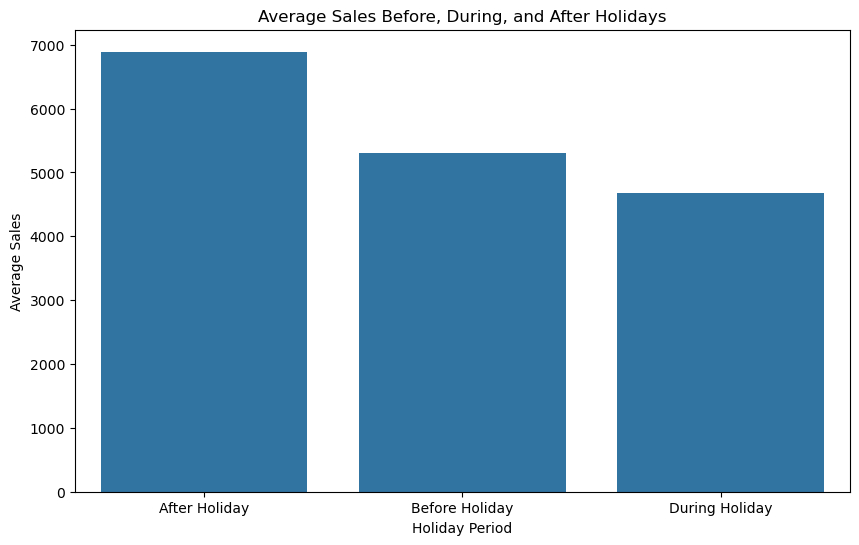

In [19]:

plt.figure(figsize=(10, 6))
sns.barplot(x='Holiday_Period', y='mean', data= sale_comparison)
plt.title('Average Sales Before, During, and After Holidays')
plt.xlabel('Holiday Period')
plt.ylabel('Average Sales')
plt.show()

### Extract Features

In [20]:
train_data['Month'] = train_data['Date'].dt.month
train_data['Day'] = train_data['Date'].dt.day

### Create Holiday Indicators

In [21]:
def holiday_indicator(row):
    if row['Month'] == 12 and row['Day'] == 25:
        return 'Christmas'
    elif row['Month'] == 1 and row['Day'] == 1:
        return 'New Year'
    elif row['Month'] == 4 and (row['Day'] >= 1 and row['Day'] <= 30):  # Example for Easter
        return 'Easter'
    # Add dates for Eid al-Fitr 
    elif (row['Month'] == 4 and row['Day'] == 21) or (row['Month'] == 5 and row['Day'] == 1):  # Eid al-Fitr example
        return 'Eid al-Fitr'
    # Add dates for Eid al-Adha 
    elif (row['Month'] == 6 and row['Day'] == 28) or (row['Month'] == 7 and row['Day'] == 6):  # Eid al-Adha example
        return 'Eid al-Adha'
    else:
        return 'Regular Day'

# Apply the function to create the 'Season' column
train_data['Season'] = train_data.apply(holiday_indicator, axis=1)

### Aggregate Sales Data

In [22]:
seasonal_sales_holiday_days = train_data.groupby("Season")["Sales"].agg(["mean","sum","count"])
seasonal_sales_holiday_days

,mean,sum,count
Season,,,
Christmas,145.351707,297971,2050
Easter,5738.866916,575895295,100350
Eid al-Adha,4329.218587,28183213,6510
Eid al-Fitr,210.248132,703280,3345
New Year,103.320873,345505,3344
Regular Day,5842.609730,5267755359,901610


### Visualization 

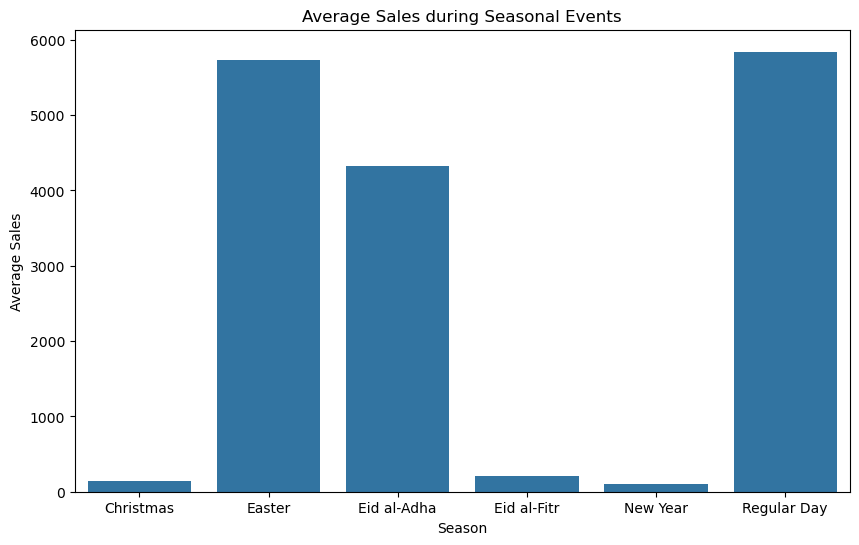

In [23]:


plt.figure(figsize=(10, 6))
sns.barplot(x='Season', y='mean', data=seasonal_sales_holiday_days)
plt.title('Average Sales during Seasonal Events')
plt.xlabel('Season')
plt.ylabel('Average Sales')
plt.show()

### Analyzing Correlation Between Sales and Customers

In [24]:
correlation = train_data['Customers'].corr(train_data['Sales'])
print(f'Correlation between Sales and Customers: {correlation}')

Correlation between Sales and Customers: 0.8947107733018369


### Effects of Promotions on Sales

In [25]:
sales_with_promo = train_data[train_data['Promo'] == 1]['Sales'].sum()
sales_without_promo = train_data[train_data['Promo'] == 0]['Sales'].sum()

print(f'sales_with_promo: {sales_with_promo}')
print(f'sales_without_promo: {sales_without_promo}')

customers_with_promotion = train_data[train_data['Promo'] ==1] ['Customers'].sum()
customers_without_promotion = train_data[train_data['Promo']==0]['Customers'].sum()

print(f'customers_with_promo: {customers_with_promotion}')
print(f'customers_without_promo: {customers_without_promotion}')

sales_with_promo: 3101206286
sales_without_promo: 2771974337
customers_with_promo: 318263948
customers_without_promo: 325777807


### Stores should promos be deployed in

In [26]:
# Group by store and calculate average sales
store_performance = train_data.groupby("Store").agg({"Sales":"mean","Customers":'mean'}).reset_index()

# Identify stores with below-average sales
average_sales = store_performance['Sales'].mean()
underperforming_stores = store_performance[store_performance['Sales'] < average_sales]


print("Stores that may benefit from promotions:")
print(underperforming_stores)
print()
print()
print(f"The sum of stores that may benefit from promotions : {underperforming_stores["Store"].count()}")


Stores that may benefit from promotions:
      Store        Sales   Customers
0         1  3945.704883  467.646497
1         2  4122.991507  486.045648
2         3  5741.253715  620.286624
4         5  3867.110403  444.360934
5         6  4562.375796  525.990446
...     ...          ...         ...
1108   1109  4043.167546  371.179420
1109   1110  3766.970276  449.000000
1110   1111  4342.968153  373.548832
1112   1113  5516.180467  596.763270
1114   1115  5225.296178  358.687898

[630 rows x 3 columns]


The sum of stores that may benefit from promotions : 630


### Assortment type affects sales

In [27]:
# Calculate total sales by assortment type
sales_by_assortment = merged_data.groupby('Assortment')['Sales'].sum().reset_index()

# Alternatively, calculate average sales
average_sales_by_assortment = merged_data.groupby('Assortment')['Sales'].mean().reset_index()

print("Total Sales by Assortment Type:")
print(sales_by_assortment)

print("\nAverage Sales by Assortment Type:")
print(average_sales_by_assortment)

Total Sales by Assortment Type:
  Assortment         Sales
0          a   98269822273
1          b    3405422976
2          c  111022288330

Average Sales by Assortment Type:
  Assortment        Sales
0          a  5378.523647
1          b  8553.931999
2          c  5940.142041


### Visualize Assortment type

C:\Users\King Betse\AppData\Local\Temp\ipykernel_25272\2522549376.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Assortment', data=sales_by_assortment, palette='viridis')


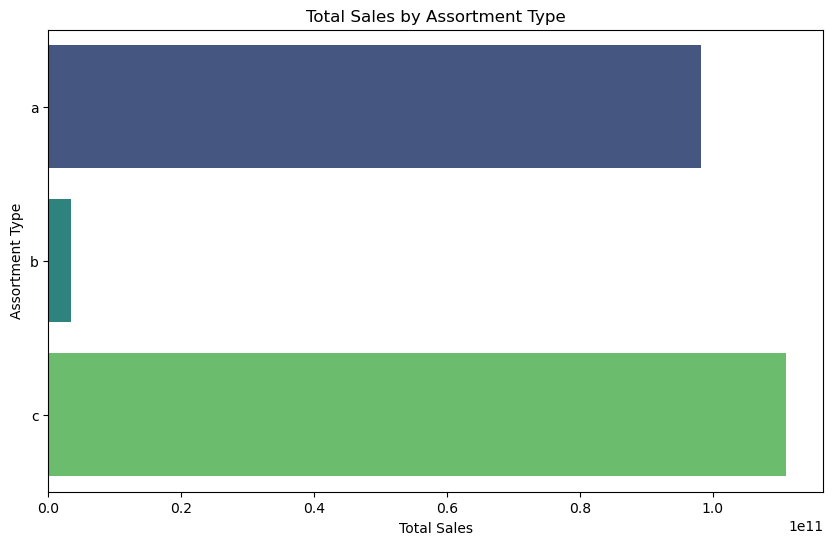

C:\Users\King Betse\AppData\Local\Temp\ipykernel_25272\2522549376.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales', y='Assortment', data=average_sales_by_assortment, palette='viridis')


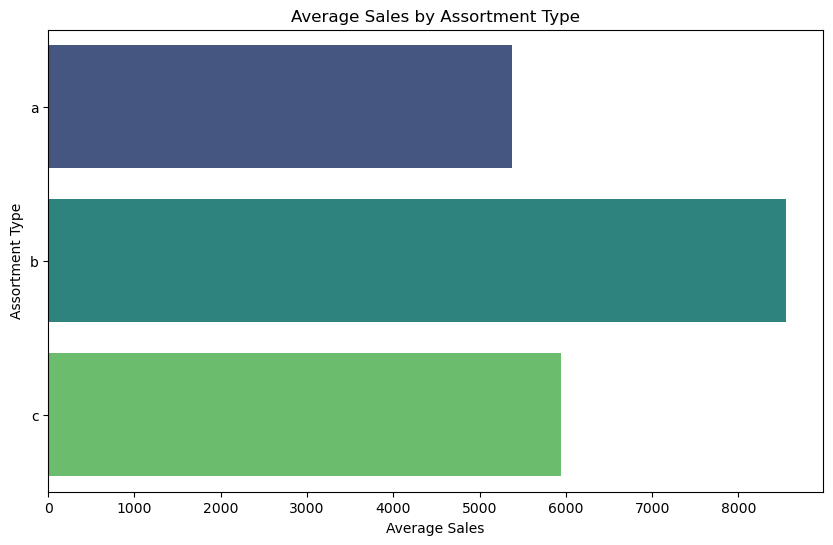

In [28]:


# Create a bar plot for total sales by assortment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Assortment', data=sales_by_assortment, palette='viridis')
plt.title('Total Sales by Assortment Type')
plt.xlabel('Total Sales')
plt.ylabel('Assortment Type')
plt.show()

# Create a bar plot for average sales by assortment type
plt.figure(figsize=(10, 6))
sns.barplot(x='Sales', y='Assortment', data=average_sales_by_assortment, palette='viridis')
plt.title('Average Sales by Assortment Type')
plt.xlabel('Average Sales')
plt.ylabel('Assortment Type')
plt.show()

### Distance to Competitors and Sales

In [29]:
# Calculate correlation
correlation = merged_data['Sales'].corr(merged_data['CompetitionDistance'])
print(f'Correlation between Sales and Competition Distance: {correlation}')

Correlation between Sales and Competition Distance: 0.0014702674610508292


### Visualization of Distance to Competitors and Sales

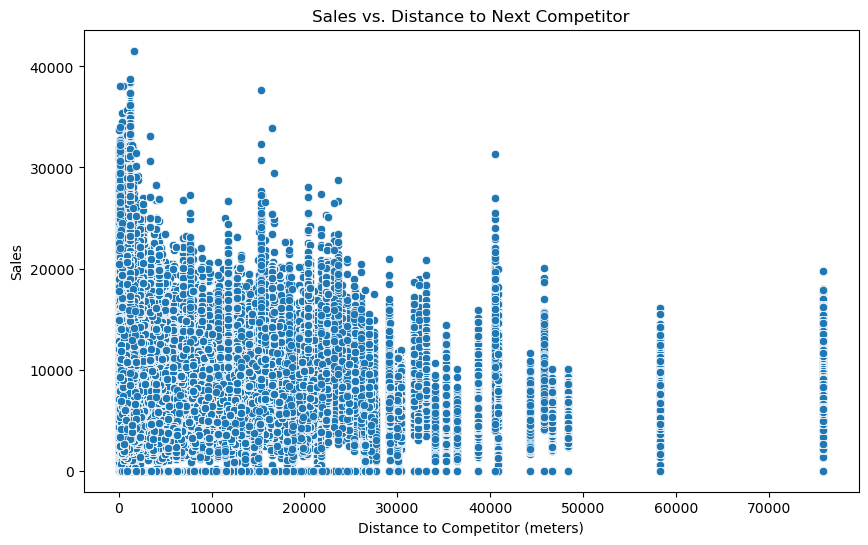

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='CompetitionDistance', y='Sales', data=merged_data)
plt.title('Sales vs. Distance to Next Competitor')
plt.xlabel('Distance to Competitor (meters)')
plt.ylabel('Sales')
plt.show()

### City Center Considerations

In [32]:
# Example threshold for city centers
city_center_threshold = 1000  # meters
city_center_stores = merged_data[merged_data['CompetitionDistance'] < city_center_threshold]

### Comparing Sales in City Centers vs. Other Areas

In [33]:
avg_sales_city_center = city_center_stores['Sales'].mean()
avg_sales_other = merged_data[merged_data['CompetitionDistance'] >= city_center_threshold]['Sales'].mean()

print(f'Average Sales in City Centers: {avg_sales_city_center}')
print(f'Average Sales in Other Areas: {avg_sales_other}')

Average Sales in City Centers: 5894.432216146531
Average Sales in Other Areas: 5613.4204371033975


### Identify Stores with NA Competitor Distance

In [34]:
# Identify stores with NA values for CompetitionDistance
stores_with_na = merged_data[merged_data['CompetitionDistance'].isna()]

# Check unique stores with NA
unique_stores_with_na = stores_with_na['Store'].unique()
print(f'Stores with NA Competition Distance: {unique_stores_with_na}')

Stores with NA Competition Distance: [291 622 879]


###  Check for Updates in Competitor Distance

In [37]:
# Filter for stores that later received competition distance values
updated_competitor_distance = merged_data[merged_data['Store'].isin(unique_stores_with_na) & merged_data['CompetitionDistance'].notna()]

print("Stores that had NA and later received competitor distance:")
print(updated_competitor_distance[['Store', 'CompetitionDistance', 'Date_y']].drop_duplicates())

Stores that had NA and later received competitor distance:
Empty DataFrame
Columns: [Store, CompetitionDistance, Date_y]
Index: []
